# EN3160 Assignment 1 on Intensity Transformations and Neighborhood Filtering #


## Implement the intensity transformation  ##



(-0.5, 719.5, 809.5, -0.5)

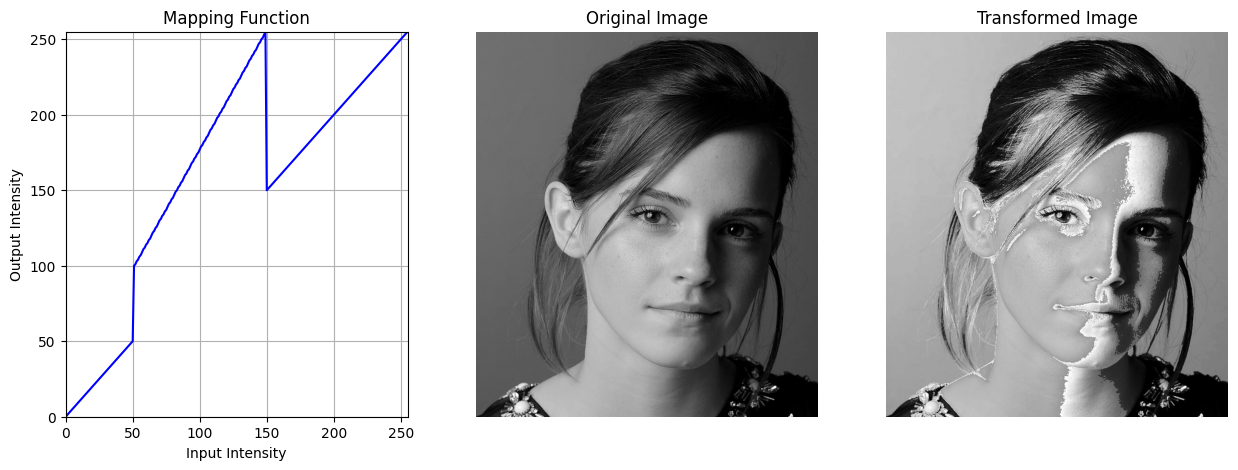

In [223]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Define breakpoints and mappings
# Each tuple: (input_intensity, output_intensity)
cp_emma = np.array([
    (0, 0),
    (50, 50),
    (51, 100),
    (149, 255),
    (150, 150),
    (255, 255)
], dtype=np.float32)

# Create LUT
LUT = np.zeros(256, dtype=np.uint8)

def linear_transform(control_points,lut ):
    for i in range(len(control_points) - 1):
        x1, y1 = control_points[i]
        x2, y2 = control_points[i + 1]
        slope = (y2 - y1) / (x2 - x1)
        for x in range(int(x1), int(x2) + 1):
            lut[x] = np.clip(slope * (x - x1) + y1, 0, 255)
    return lut
            
LUT = linear_transform(cp_emma, LUT)
# Read image in grayscale
img_orig = cv2.imread('a1images/emma.jpg', cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.plot(LUT, color='blue')
plt.title('Mapping Function')
plt.xlabel('Input Intensity')
plt.ylabel('Output Intensity')
plt.grid()
plt.xlim(0, 255)
plt.ylim(0, 255)

plt.subplot(132)
plt.imshow(img_orig, cmap='gray')
plt.title('Original Image')
plt.axis('off')

img_transformed = cv2.LUT(img_orig, LUT)
plt.subplot(133)
plt.imshow(img_transformed, cmap='gray')
plt.title('Transformed Image')
plt.axis('off')




##  Brain Proton Density Image ##


### White Matter ###


<function matplotlib.pyplot.show(close=None, block=None)>

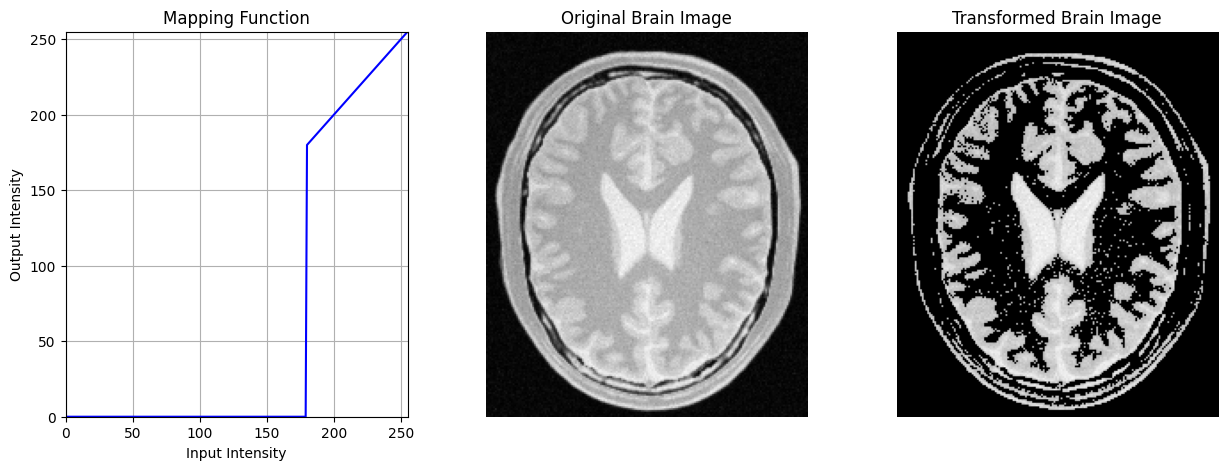

In [224]:
cp_wm = np.array([
    (0,0),
    (179,0),
    (180,180),
    (255,255)
])

wm_lut = np.zeros(256, dtype=np.uint8)

wm_lut = linear_transform(cp_wm, wm_lut)

plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.plot(wm_lut, color='blue')
plt.title('Mapping Function')
plt.xlabel('Input Intensity')
plt.ylabel('Output Intensity')
plt.grid()
plt.xlim(0, 255)
plt.ylim(0, 255)



img_brain = cv2.imread('a1images/brain_proton_density_slice.png', cv2.IMREAD_GRAYSCALE)

plt.subplot(132)
plt.imshow(img_brain, cmap='gray')
plt.title('Original Brain Image')
plt.axis('off')

img_brain_transformed_WM = cv2.LUT(img_brain, wm_lut)

plt.subplot(133)
plt.imshow(img_brain_transformed_WM, cmap='gray')
plt.title('Transformed Brain Image')
plt.axis('off')

plt.show

### Gray Matter


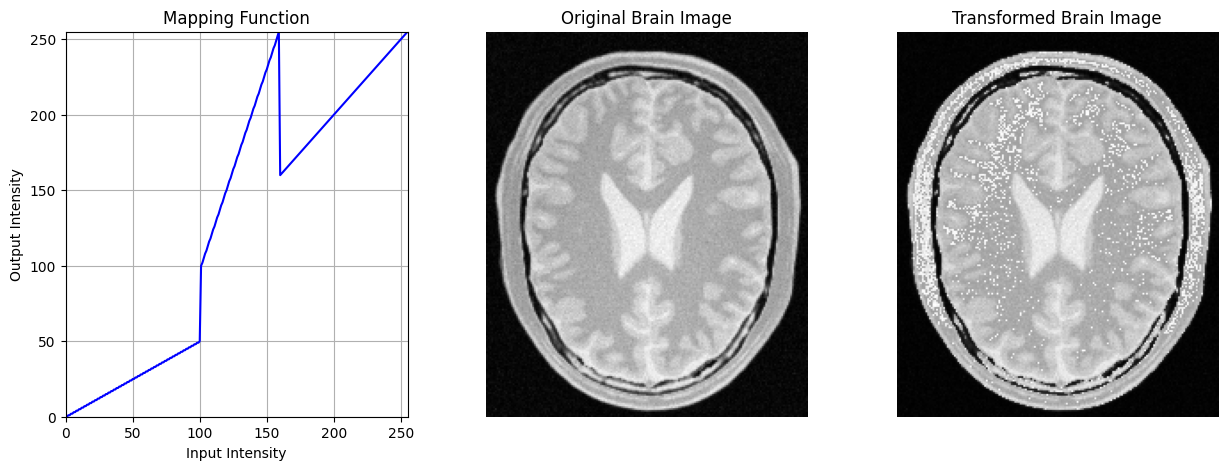

In [225]:
cp_gm = np.array([
   (0, 0),
    (100, 50),
    (101, 100),
    (159, 255),
    (160, 160),
    (255, 255)
], )

   
gm_lut = np.zeros(256, dtype=np.uint8) 
gm_lut = linear_transform(cp_gm, gm_lut)
img_brain_transformed_GM = cv2.LUT(img_brain, gm_lut)

plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.plot(gm_lut, color='blue')
plt.title('Mapping Function')
plt.xlabel('Input Intensity')
plt.ylabel('Output Intensity')
plt.grid()
plt.xlim(0, 255)
plt.ylim(0, 255)


plt.subplot(132)

plt.imshow(img_brain, cmap='gray')
plt.title('Original Brain Image')
plt.axis('off')

plt.subplot(133)
plt.imshow(img_brain_transformed_GM, cmap='gray')
plt.title('Transformed Brain Image')
plt.axis('off')

plt.show()



## Applying Gamma Correction

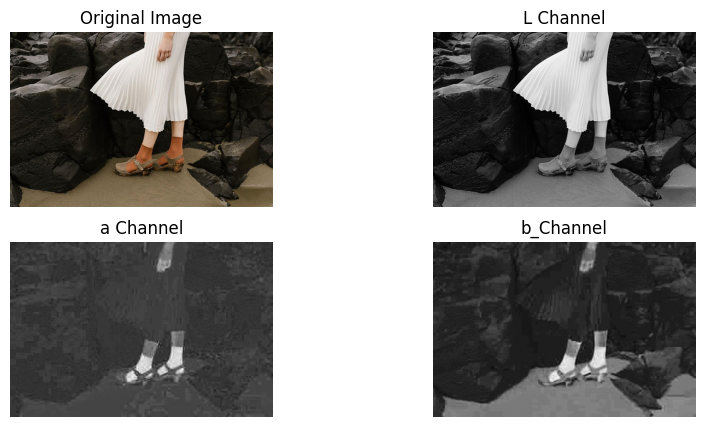

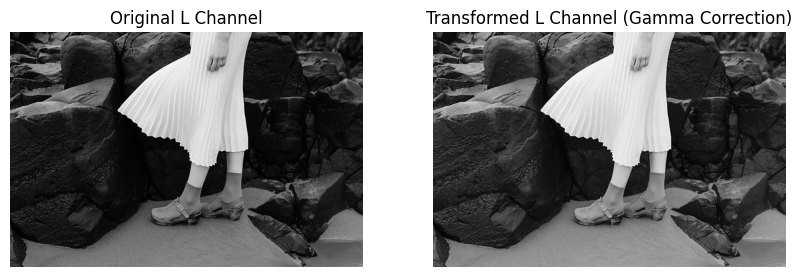

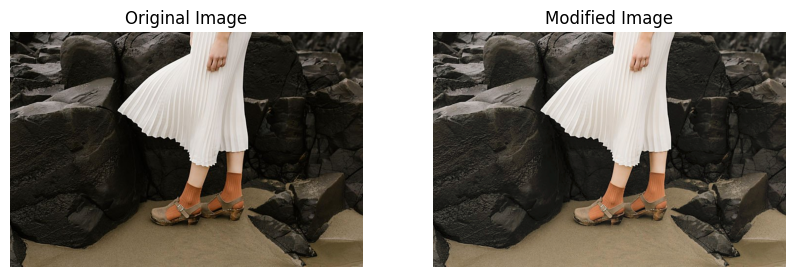

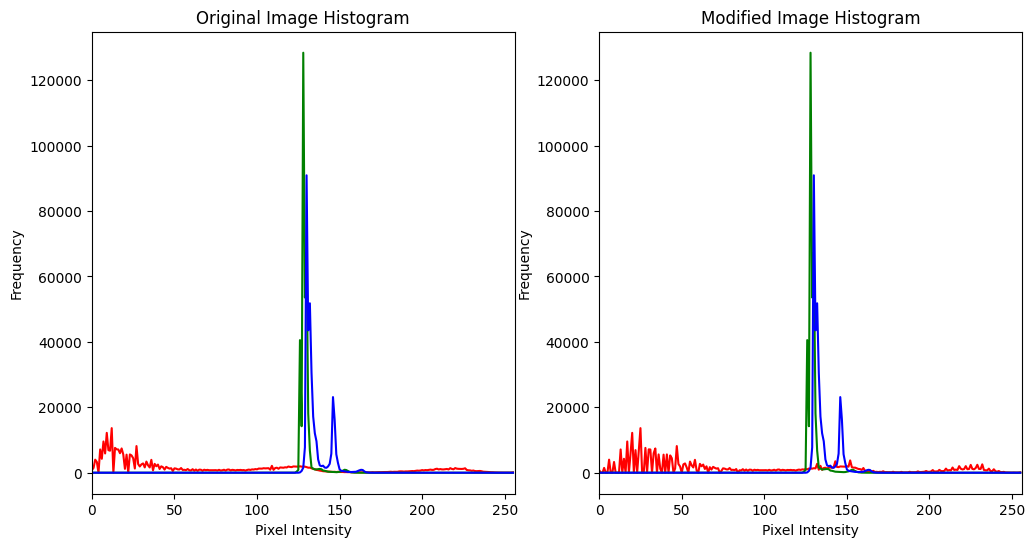

In [226]:
org_img = cv2.imread('a1images\highlights_and_shadows.jpg', cv2.IMREAD_COLOR)
rgb_img = cv2.cvtColor(org_img, cv2.COLOR_BGR2RGB)

chnl_img = cv2.cvtColor(org_img, cv2.COLOR_BGR2Lab)

L_channel, a_channel, b_channel = cv2.split(chnl_img)

plt.figure(figsize=(10,5))
plt.subplot(221)
plt.imshow(rgb_img)
plt.title('Original Image')
plt.axis('off') 

plt.subplot(222)
plt.imshow(L_channel, cmap='gray')
plt.title('L Channel')
plt.axis('off')

plt.subplot(223)
plt.imshow(a_channel, cmap='gray')
plt.title('a Channel')
plt.axis('off')

plt.subplot(224)
plt.imshow(b_channel, cmap='gray')  
plt.title('b_Channel')
plt.axis('off')
plt.show()

gamma = 0.75
table = np.array([((i / 255.0) ** gamma) * 255 for i in np.arange(0, 256)]).astype("uint8")
L_channel_transformed = cv2.LUT(L_channel, table)

plt.figure(figsize=(10,5))
plt.subplot(121)
plt.imshow(L_channel, cmap='gray')
plt.title('Original L Channel')
plt.axis('off')

plt.subplot(122)
plt.imshow(L_channel_transformed , cmap='gray')
plt.title('Transformed L Channel (Gamma Correction)')
plt.axis('off')

# Merge the modified L channel with the original a and b channels
modified_lab_img = cv2.merge((L_channel_transformed, a_channel, b_channel))

# Convert back to RGB color space
modified_chnl_img = cv2.cvtColor(modified_lab_img, cv2.COLOR_Lab2BGR)
modified_rgb_img = cv2.cvtColor(modified_chnl_img, cv2.COLOR_BGR2RGB)

# Display the original and modified RGB images
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.imshow(rgb_img)
plt.title('Original Image') 
plt.axis('off')
plt.subplot(122)
plt.imshow(modified_rgb_img)
plt.title('Modified Image')
plt.axis('off')

#The histograms of the original and corrected images
fig,ax = plt.subplots(1, 2, figsize=(12, 6))
space = ('l', 'a', 'b')
colors = ('r', 'g', 'b')

for i, c in enumerate(space):
    hist_orig = cv2.calcHist([chnl_img], [i], None, [256], [0, 256])       # Calculate histogram for original image
    ax[0].plot(hist_orig, color=colors[i])
    hist_gamma = cv2.calcHist([modified_lab_img], [i], None, [256], [0, 256])       # Calculate histogram for gamma corrected image
    ax[1].plot(hist_gamma, color=colors[i])

ax[0].set_title('Original Image Histogram')
ax[1].set_title('Modified Image Histogram')
ax[0].set_xlim([0, 256])
ax[1].set_xlim([0, 256])
ax[0].set_xlabel('Pixel Intensity')
ax[1].set_xlabel('Pixel Intensity')
ax[0].set_ylabel('Frequency')
ax[1].set_ylabel('Frequency')
plt.show()    






## Increasing the vibrance of a photograph



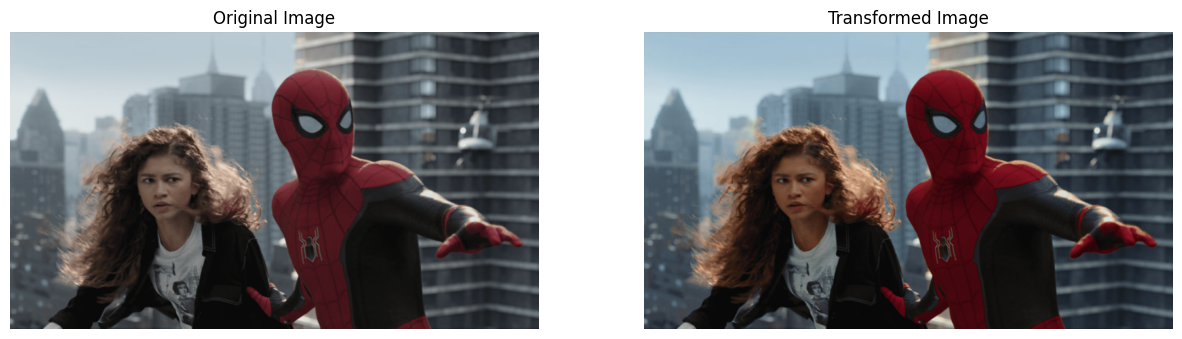

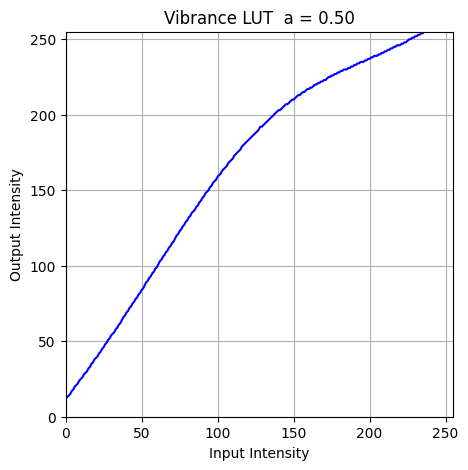

In [227]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv


def vibrance_transform(image, a, sigma=70):
    
    
    rgb_img = cv.cvtColor(image, cv.COLOR_BGR2RGB)
    hsv_img = cv.cvtColor(rgb_img, cv.COLOR_BGR2HSV)
    h_channel, s_channel, v_channel = cv.split(hsv_img)

    lut = np.array([int(min(x + (a * 128) * np.exp((-(x - 128) ** 2) / (2 * (sigma ** 2))), 255)) for x in range(256)], dtype=np.uint8)

    s_channel_transformed = cv.LUT(s_channel, lut)
    hsv_img_transformed = cv.merge((h_channel, s_channel_transformed, v_channel))
    rgb_img_transformed = cv.cvtColor(hsv_img_transformed, cv.COLOR_HSV2BGR)
    
    plt.figure(figsize=(15, 5))

    plt.subplot(121)
    plt.imshow(rgb_img)
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(122)
    plt.imshow(rgb_img_transformed)
    plt.title('Transformed Image')
    plt.axis('off')

    intensity_values = np.arange(256)
    plt.figure(figsize=(5, 5))
    plt.plot(intensity_values, lut, color='blue')
    plt.title('Vibrance LUT  a = {:.2f}'.format(a))
    plt.xlabel('Input Intensity')
    plt.ylabel('Output Intensity')
    plt.grid()
    plt.xlim(0, 255)
    plt.ylim(0, 255)
    plt.show()

spider_img = cv.imread('a1images/spider.png',cv2.IMREAD_COLOR)

# a_value = [i*0.25 for i in range(0, 5, 1)]        # Example values for 'a'

# for a in a_value:
#     vibrance_transform(spider_img, a)

vibrance_transform(spider_img, 0.5)  # Example with a single value for 'a'

## Histogram  Equalization

(-1000.0, 54154.0)

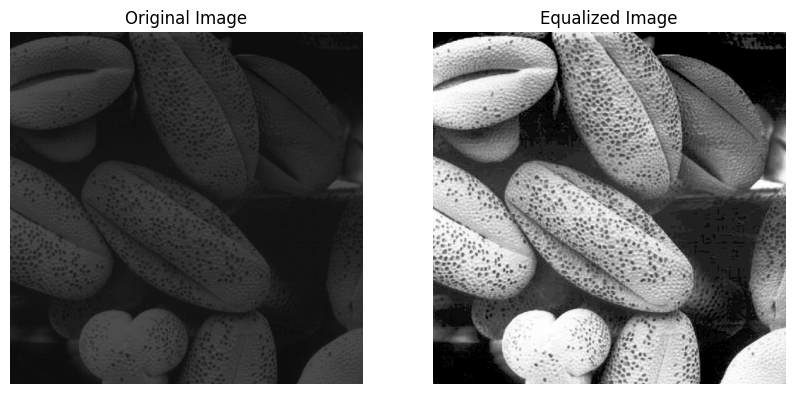

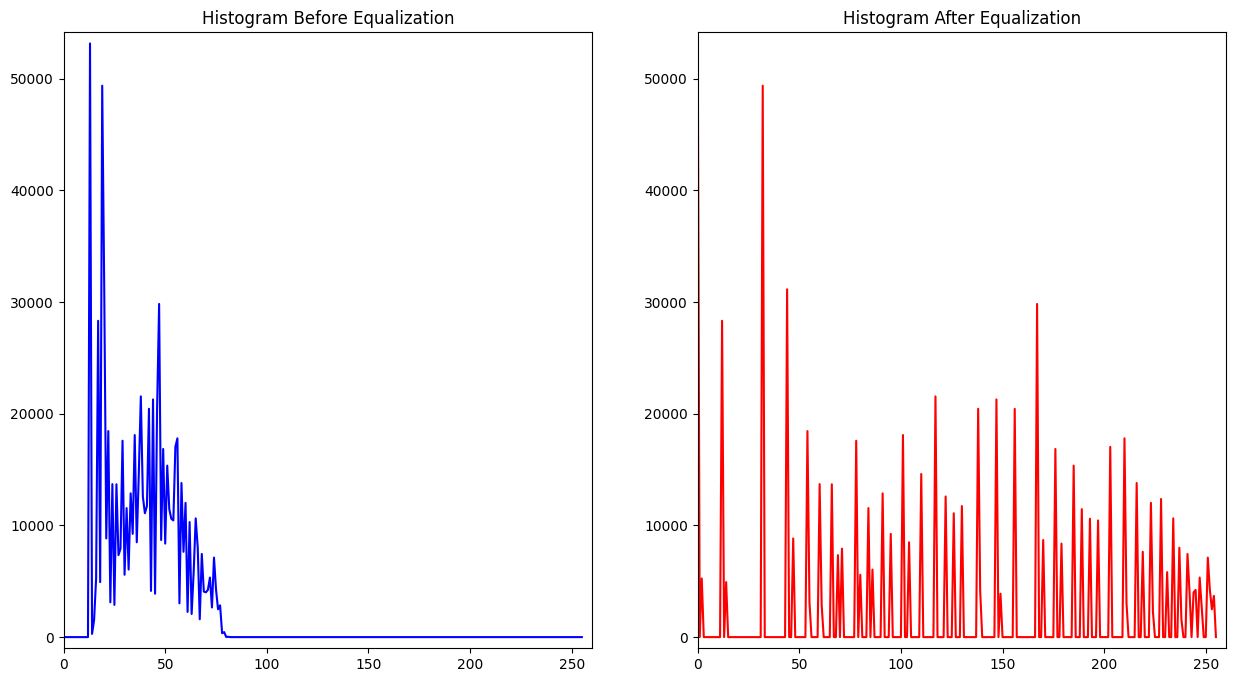

In [228]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


def custom_histogram_equalization(image):

    # Compute histogram
    hist, bins = np.histogram(image.flatten(), bins=256, range=[0, 256])

    # Compute cumulative distribution function (CDF)
    cdf = hist.cumsum()
    cdf_normalized = cdf * hist.max() / cdf.max()

    # Normalize the CDF to [0, 255]

    cdf_m = np.ma.masked_equal(cdf, 0) # Mask zeros to avoid division by zero
    cdf_m = (cdf_m - cdf_m.min())* 255 / (cdf_m.max() - cdf_m.min())
    cdf_final = np.ma.filled(cdf_m, 0).astype('uint8') # Fill masked values with 0 and convert to uint8

    # Map the original pixel values to the new pixel values using the CDF

    img_equalized = cdf_final[image]
    
    # histogram after equalization
    hist_after_equal, _ = np.histogram(img_equalized.flatten(), bins=256, range=[0, 256])

    return img_equalized, hist  , hist_after_equal


img = cv2.imread("a1images/shells.tif") 

equalized_img, hist_before, hist_after = custom_histogram_equalization(img)

plt.figure(figsize=(10,10))

plt.subplot(121)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.subplot(122)
plt.imshow(equalized_img, cmap='gray')
plt.title('Equalized Image')
plt.axis('off')

plt.figure(figsize=(15, 8))
plt.subplot(121)
plt.plot(hist_before, color='b')
plt.title("Histogram Before Equalization")
plt.xlim([0, 260])
plt.ylim([-1000,hist_before.max() + 1000])

plt.subplot(122)
plt.plot(hist_after, color='r')
plt.title("Histogram After Equalization")
plt.xlim([0, 260])
plt.ylim([-1000,hist_before.max() + 1000 ])










## Histogram Equalization to Make Histogram Equlaized Foreground

###  (a)  hue, saturation, and values and display these planes in grayscale 

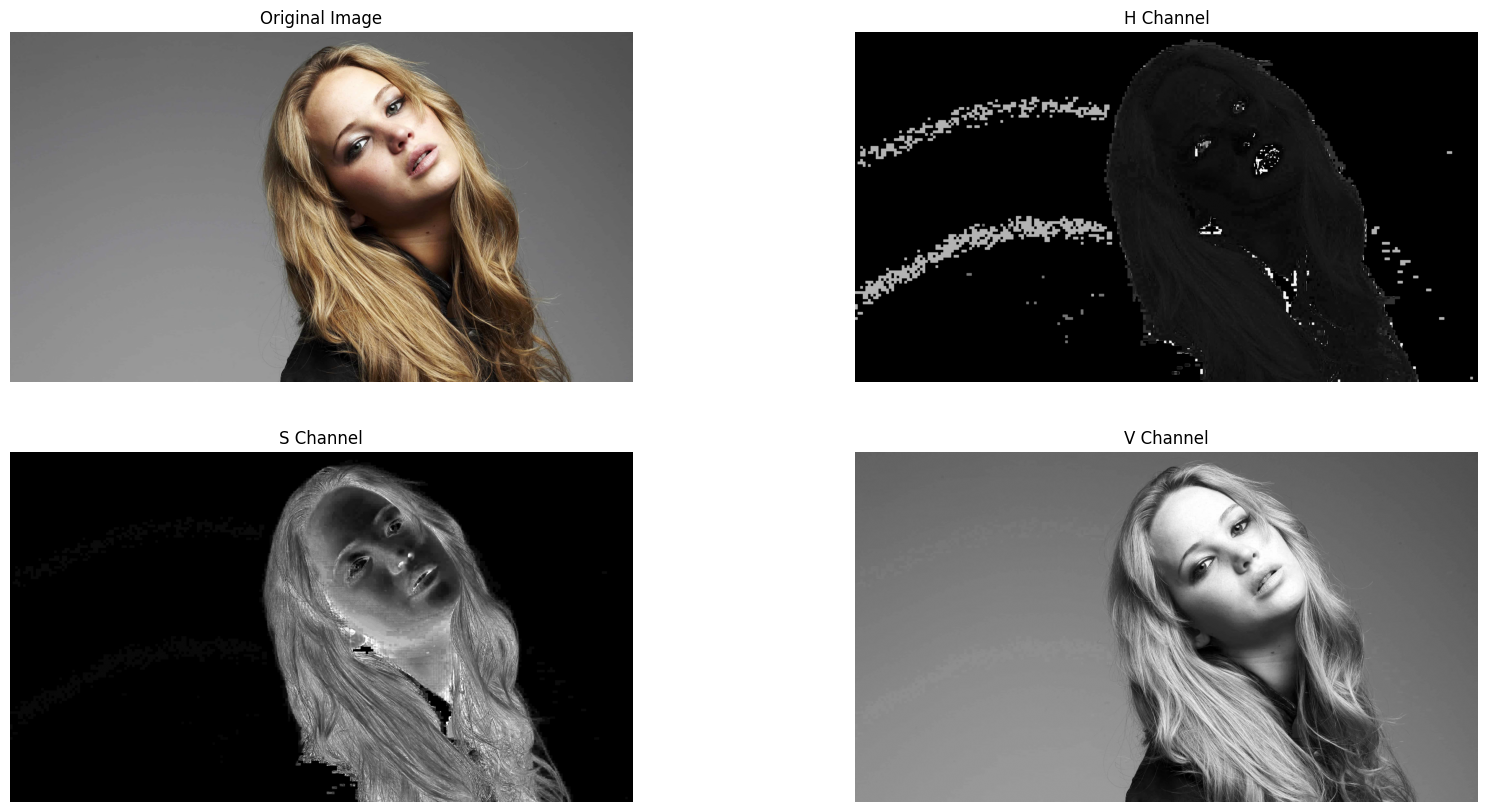

In [229]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img_jeniffer = cv.imread('a1images/jeniffer.jpg', cv2.IMREAD_COLOR)

img_jeniffer_rgb = cv.cvtColor(img_jeniffer, cv2.COLOR_BGR2RGB)

img_jeniffer_hsv = cv.cvtColor(img_jeniffer_rgb, cv2.COLOR_RGB2HSV)

h_channel, s_channel, v_channel = cv.split(img_jeniffer_hsv)

plt.figure(figsize=(20, 10))

plt.subplot(221)
plt.imshow(img_jeniffer_rgb, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(222)
plt.imshow(h_channel, cmap='gray')
plt.title('H Channel')
plt.axis('off')

plt.subplot(223)
plt.imshow(s_channel, cmap='gray')
plt.title('S Channel')
plt.axis('off')

plt.subplot(224)
plt.imshow(v_channel, cmap='gray')
plt.title('V Channel')
plt.axis('off')
plt.show()






###  (b) Select the appropriate plane to threshold in extract the foreground mask

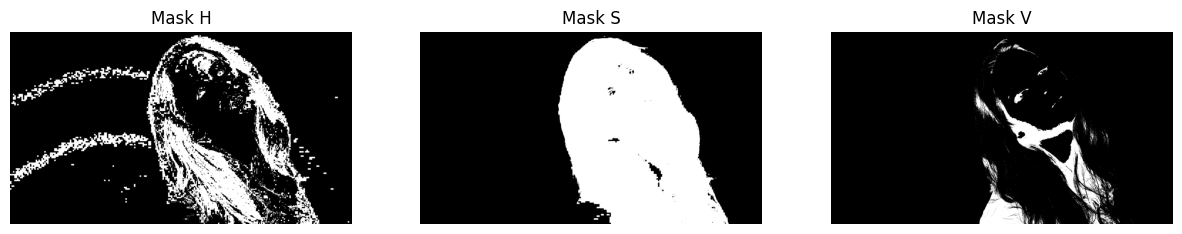

(-0.5, 3839.5, 2159.5, -0.5)

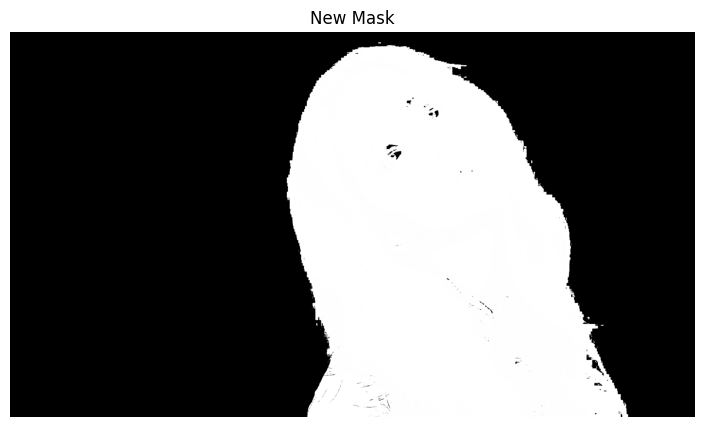

In [230]:
# T
threshold = 15


_, mask_h = cv2.threshold(h_channel, threshold, 255, cv2.THRESH_BINARY)
_, mask_s = cv2.threshold(s_channel, threshold, 255, cv2.THRESH_BINARY)
_, mask_v = cv2.threshold(v_channel, 50, 255, cv2.THRESH_BINARY)



plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.imshow(mask_h, cmap='gray')
plt.title('Mask H')
plt.axis('off')
plt.subplot(132)
plt.imshow(mask_s, cmap='gray')
plt.title('Mask S')
plt.axis('off')
plt.subplot(133)
plt.imshow(255-mask_v, cmap='gray')
plt.title('Mask V')
plt.axis('off')
plt.show()





mask = mask_s + 255- mask_v

plt.figure(figsize=(10, 5))
plt.imshow(mask, cmap='gray')
plt.title('New Mask')
plt.axis('off')









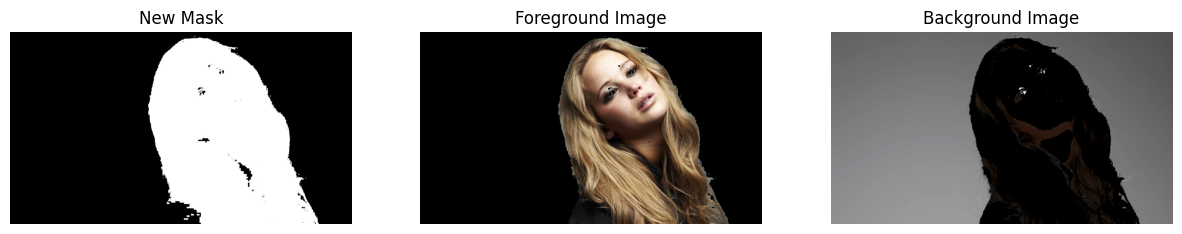

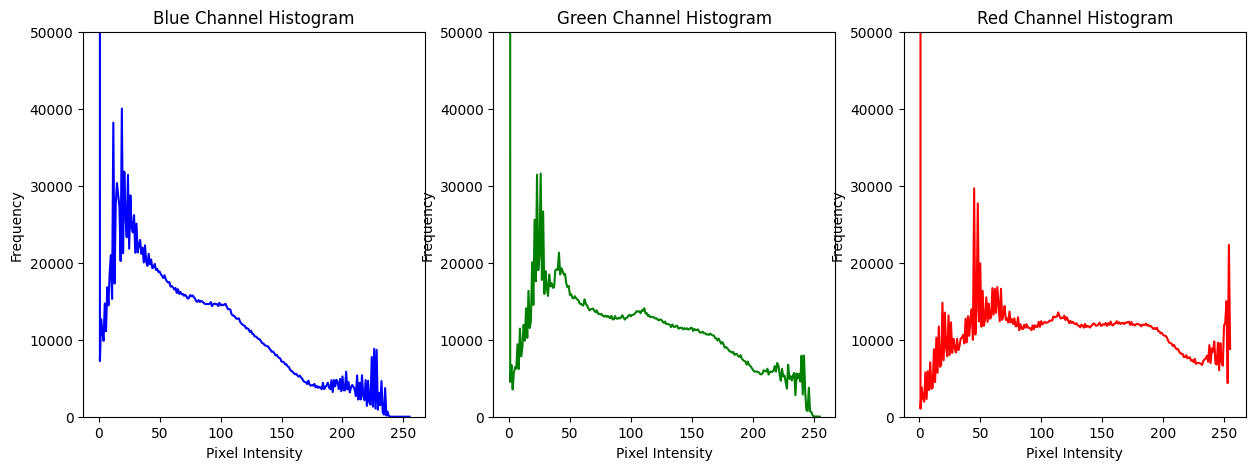

In [233]:
foreground_img = cv.bitwise_and(img_jeniffer, img_jeniffer, mask=mask.astype(np.uint8)  )
background_img = cv.bitwise_and(img_jeniffer, img_jeniffer, mask=cv.bitwise_not(mask.astype(np.uint8))  )

plt.figure(figsize=(15, 5))


plt.subplot(131)
plt.imshow(mask_s, cmap='gray')
plt.title('New Mask')
plt.axis('off')
plt.subplot(132)
plt.imshow(cv.cvtColor(foreground_img, cv2.COLOR_BGR2RGB) )
plt.title('Foreground Image')
plt.axis('off')
plt.subplot(133)
plt.imshow(cv.cvtColor(background_img, cv2.COLOR_BGR2RGB) )
plt.title('Background Image')
plt.axis('off')
plt.show()


blue_channel_hist = cv.calcHist([foreground_img], [0], None, [256],[0,256])
green_channel_hist = cv.calcHist([foreground_img], [1], None, [256],[0,256])
red_channel_hist = cv.calcHist([foreground_img], [2], None, [256],[0,256])

y_lim = [0, 50000]

plt.figure(figsize=(15, 5))
plt.subplot(131)
plt.plot(blue_channel_hist, color='b', label='Red Channel')
plt.title('Blue Channel Histogram')
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.ylim(y_lim)

plt.subplot(132)
plt.title('Green Channel Histogram')
plt.plot(green_channel_hist, color='g', label='Green Channel')
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.ylim(y_lim)

plt.subplot(133)
plt.title('Red Channel Histogram')
plt.plot(red_channel_hist, color='r', label='Blue Channel')
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.ylim(y_lim)


plt.show()

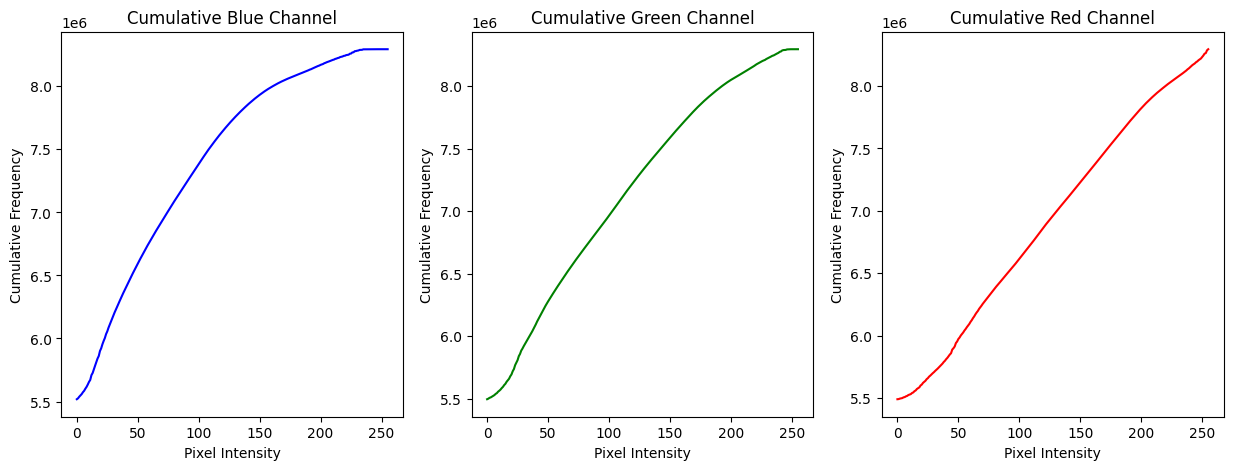

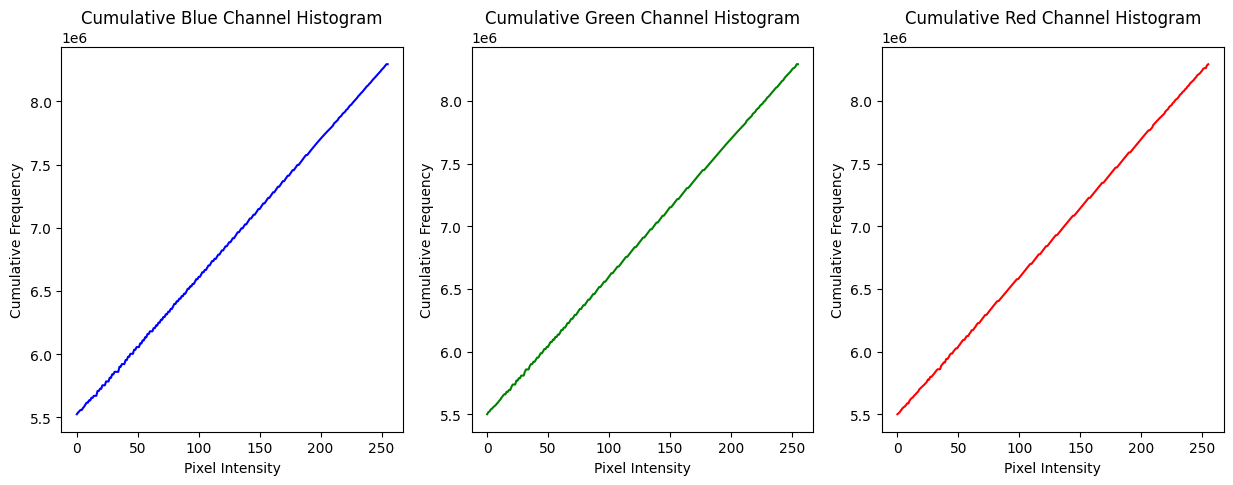

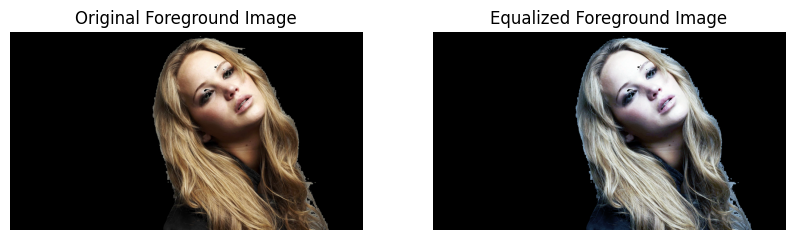

In [232]:
cumulative_blue = np.cumsum(blue_channel_hist)
cumulative_green = np.cumsum(green_channel_hist)
cumulative_red = np.cumsum(red_channel_hist)

plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.plot(cumulative_blue, color='b', label='Cumulative Blue Channel')
plt.title('Cumulative Blue Channel')
plt.xlabel('Pixel Intensity')
plt.ylabel('Cumulative Frequency')

plt.subplot(132)
plt.plot(cumulative_green, color='g', label='Cumulative Green Channel')
plt.title('Cumulative Green Channel')
plt.xlabel('Pixel Intensity')
plt.ylabel('Cumulative Frequency')

plt.subplot(133)
plt.plot(cumulative_red, color='r', label='Cumulative Red Channel')
plt.title('Cumulative Red Channel')
plt.xlabel('Pixel Intensity')
plt.ylabel('Cumulative Frequency')

plt.show()

blue_equalized, blue_hist, blue_equalized_hist  = custom_histogram_equalization(foreground_img[:, :, 0])
green_equalized, green_hist, green_equalized_hist = custom_histogram_equalization(foreground_img[:, :, 1])
red_equalized, red_hist, red_equalized_hist = custom_histogram_equalization(foreground_img[:, :, 2])

plt.figure(figsize=(15, 5))
plt.subplot(131)
plt.plot(np.cumsum(blue_equalized_hist), color='b')
plt.title('Cumulative Blue Channel Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Cumulative Frequency')
plt.subplot(132)
plt.plot(np.cumsum(green_equalized_hist), color='g')
plt.title('Cumulative Green Channel Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Cumulative Frequency')
plt.subplot(133)
plt.plot(np.cumsum(red_equalized_hist), color='r')
plt.title('Cumulative Red Channel Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Cumulative Frequency')
plt.show()

equalized_img = cv.merge((blue_equalized, green_equalized, red_equalized))

plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.imshow(cv.cvtColor(foreground_img, cv2.COLOR_BGR2RGB))
plt.title('Original Foreground Image')
plt.axis('off')
plt.subplot(122)
plt.imshow(cv.cvtColor(equalized_img, cv2.COLOR_BGR2RGB))
plt.title('Equalized Foreground Image')
plt.axis('off')
plt.show()











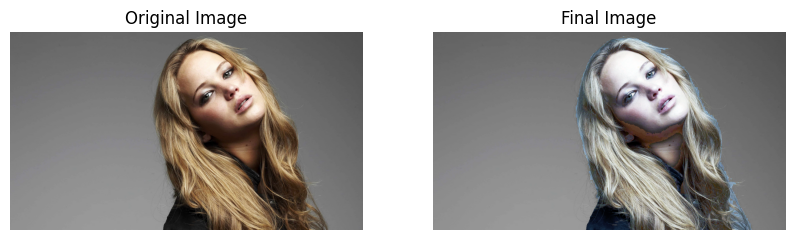

In [235]:
final_img = cv.add(background_img, equalized_img)
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.imshow(img_jeniffer_rgb)
plt.title("Original Image")
plt.axis('off')
plt.subplot(122)
plt.imshow(cv.cvtColor(final_img, cv2.COLOR_BGR2RGB))
plt.title("Final Image")
plt.axis('off')
plt.show()


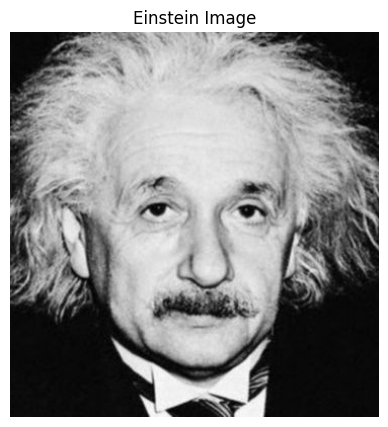

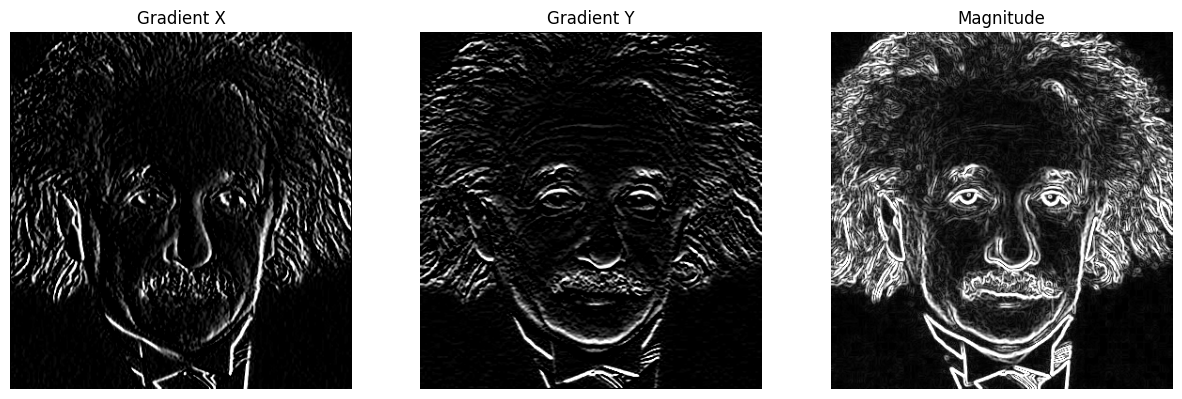

In [276]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

def sobel_filter_opencv(image) :

    sobel_x = np.array([
        [1, 0, -1],
        [2, 0, -2],
        [1, 0, -1]
    ], dtype=np.float32)
    
    sobel_y = np.array([
        [1, 2, 1],
        [0, 0, 0],
        [-1, -2, -1]
    ], dtype=np.float32)

    grad_x = cv.filter2D(image, cv.CV_32F, sobel_x)
    grad_y = cv.filter2D(image, cv.CV_32F, sobel_y)

    magnitude = np.sqrt(grad_x**2 + grad_y**2)

    grad_x = np.clip(grad_x, 0, 255).astype(np.uint8)
    grad_y = np.clip(grad_y, 0, 255).astype(np.uint8)
    magnitude = np.clip(magnitude, 0, 255).astype(np.uint8)

    return grad_x, grad_y, magnitude

img_einstein = cv.imread('a1images\einstein.png', cv.IMREAD_GRAYSCALE)

plt.figure(figsize=(5, 5))
plt.imshow(img_einstein, cmap='gray')
plt.title('Einstein Image')
plt.axis('off')

grad_x, grad_y, magnitude = sobel_filter_opencv(img_einstein)
plt.figure(figsize=(15, 5))
plt.subplot(131)
plt.imshow(grad_x, cmap='gray')
plt.title('Gradient X')
plt.axis('off')
plt.subplot(132)
plt.imshow(grad_y, cmap='gray')
plt.title('Gradient Y')
plt.axis('off')
plt.subplot(133)
plt.imshow(magnitude, cmap='gray')
plt.title('Magnitude')
plt.axis('off')

plt.show()    



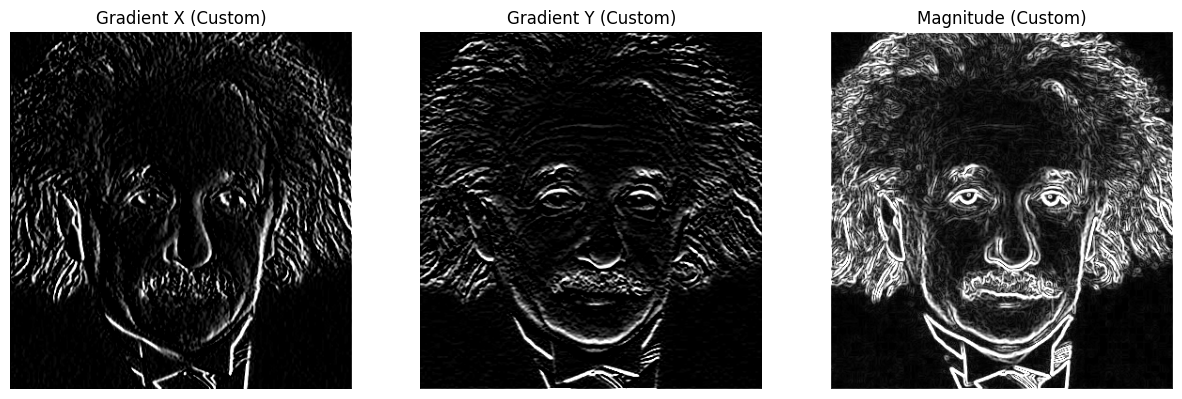

In [ ]:
def  custom_convolution(image, kernel):

    img_h, img_w = image.shape
    kernel_h, kernel_w = kernel.shape

    pad_h = kernel_h // 2
    pad_w = kernel_w // 2

    padded_image = np.pad(image, ((pad_h, pad_h), (pad_w, pad_w)), mode='constant')

    output_image = np.zeros_like(image, dtype=np.float32)

    for i in range(img_h):
        for j in range(img_w):
            region = padded_image[i:i + kernel_h, j:j + kernel_w]
            output_image[i, j] = np.sum(region * kernel)

    return output_image

def sobel_filter_custom(image):

    sobel_x = np.array([
        [1, 0, -1],
        [2, 0, -2],
        [1, 0, -1]
    ], dtype=np.float32)
    
    sobel_y = np.array([
        [1, 2, 1],
        [0, 0, 0],
        [-1, -2, -1]
    ], dtype=np.float32)

    grad_x = custom_convolution(image.astype(np.float32), sobel_x)
    grad_y = custom_convolution(image.astype(np.float32), sobel_y)  

    magnitude = np.sqrt(grad_x**2 + grad_y**2)

    grad_x = np.clip(grad_x, 0, 255).astype(np.uint8)
    grad_y = np.clip(grad_y, 0, 255).astype(np.uint8)
    magnitude = np.clip(magnitude, 0, 255).astype(np.uint8)

    return grad_x, grad_y, magnitude

grad_x_custom, grad_y_custom, magnitude_custom = sobel_filter_custom(img)

plt.figure(figsize=(15, 5))
plt.subplot(131)
plt.imshow(grad_x_custom, cmap='gray')
plt.title('Gradient X (Custom)')
plt.axis('off')
plt.subplot(132)
plt.imshow(grad_y_custom, cmap='gray')
plt.title('Gradient Y (Custom)')
plt.axis('off')
plt.subplot(133)
plt.imshow(magnitude_custom, cmap='gray')
plt.title('Magnitude (Custom)')
plt.axis('off')
plt.show()


    


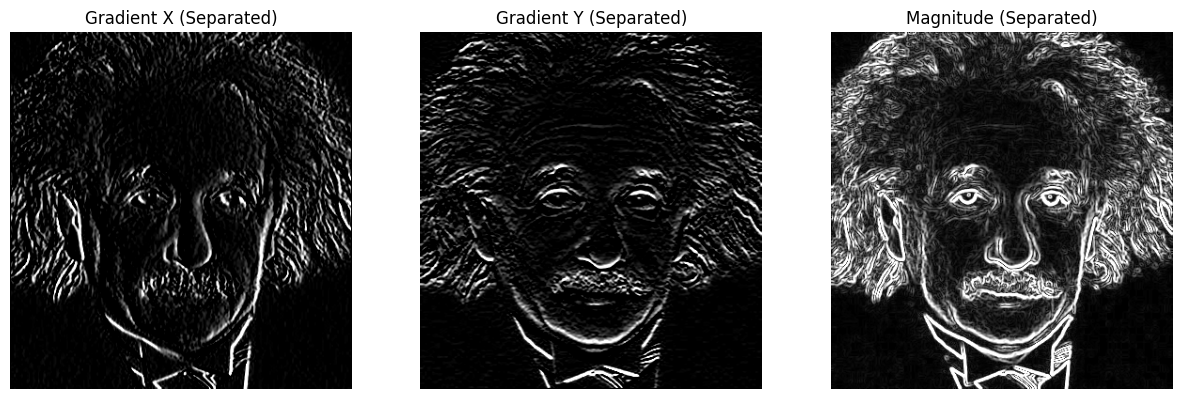

In [281]:
# Set the kernel values for Sobel X
kernel_x_v = np.array([[1], [2], [1]], dtype=np.float32)
kernel_x_h = np.array([[1,0,-1]], dtype=np.float32)

temp_x = cv.filter2D(img_einstein, cv.CV_32F, kernel_x_v)
sobel_x_sep = cv.filter2D(temp_x, cv.CV_32F, kernel_x_h)

# Set the kernel values for Sobel Y
kernel_y_v = np.array([[1],[0],[-1]], dtype=np.float32)
kernel_y_h = np.array([[1,2,1]], dtype=np.float32)

temp_y = cv.filter2D(img_einstein, cv.CV_32F, kernel_y_v)
sobel_y_sep = cv.filter2D(temp_y, cv.CV_32F, kernel_y_h)

magnitude_sep = np.sqrt(sobel_x_sep**2 + sobel_y_sep**2)

sobel_x_sep = np.clip(sobel_x_sep, 0, 255).astype(np.uint8)
sobel_y_sep = np.clip(sobel_y_sep, 0, 255).astype(np.uint8)
magnitude_sep = np.clip(magnitude_sep, 0, 255).astype(np.uint8)
plt.figure(figsize=(15, 5))
plt.subplot(131)
plt.imshow(sobel_x_sep, cmap='gray')
plt.title('Gradient X (Separated)')
plt.axis('off')
plt.subplot(132)
plt.imshow(sobel_y_sep, cmap='gray')
plt.title('Gradient Y (Separated)')
plt.axis('off')
plt.subplot(133)
plt.imshow(magnitude_sep, cmap='gray')
plt.title('Magnitude (Separated)')
plt.axis('off')
plt.show()    









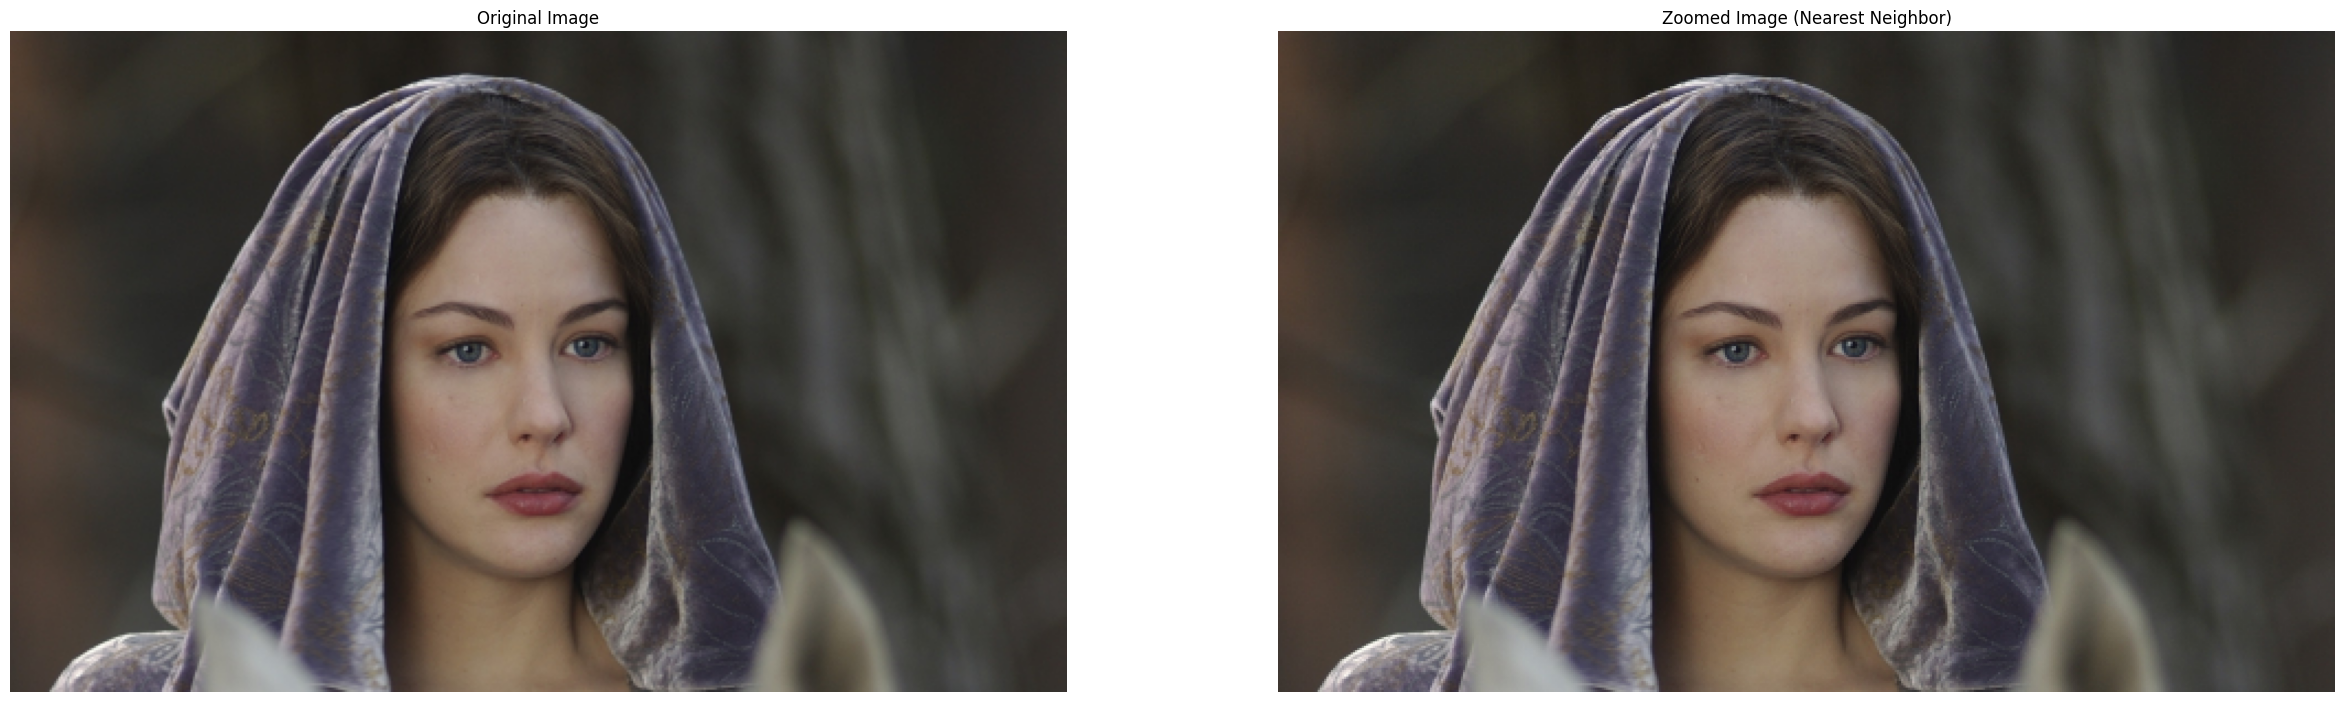

In [289]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

def nearest_neighbor_zoom(image, scale_factor):

    img_h, img_w, img_c = image.shape

    new_h = int(img_h * scale_factor)
    new_w = int(img_w * scale_factor)

    if len(image.shape) == 2:
        new_image = np.zeros((new_h, new_w), dtype=image.dtype)
    else:
        new_image = np.zeros((new_h, new_w, img_c), dtype=image.dtype)
    
    for i in range(new_h):
        for j in range(new_w):
            orig_x = int(i / scale_factor)
            orig_y = int(j / scale_factor)

            orig_x = min(orig_x, img_h - 1)
            orig_y = min(orig_y, img_w - 1)

            new_image[i, j] = image[orig_x, orig_y]

    return new_image


img = cv.imread('a1images/a1q5images/im02small.png', cv.IMREAD_COLOR)

scale_factor = 5
zoomed_image = nearest_neighbor_zoom(img, scale_factor)

# save the zoomed image
cv.imwrite('a1images/a1q5images/zoomed_image.png', zoomed_image)
plt.figure(figsize=(30, 30))
plt.subplot(121)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')
plt.subplot(122)
plt.imshow(cv.cvtColor(zoomed_image, cv.COLOR_BGR2RGB))
plt.title('Zoomed Image (Nearest Neighbor)')
plt.axis('off')
plt.show()